Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Juan Gómez y Nicolas Guarín-Zapata 2019. Este material es parte del curso Mecánica de los Medios Continuos en el programa de Ingeniería Civil de la Universidad EAFIT.

# Solución analitica

## Introduction

Este note book evalua la solucón analitica para una presa triangular de ángulo interno igual a $45 \circ$ sometida al empuje de un fluido de peso especifico $\gamma$ en condiciones hidroestáticas. La solución se usa para efectos de verificación del análisis por elementos finitos de una presa de sección trapezoidal.

## Solución
El dominio del problema se muestra a continuación:


<center><img src="img/dam_analitica.png" alt="mesh" style="width:400px"></center>


La solución de tensiones esta dada por:

$$
\sigma_{xx}=\gamma(y-H)
$$

$$
\sigma_{yy}=-2\gamma x-\gamma(y-H)
$$


$$
\tau_{yy}=-\gamma x
$$


## Visualización de la solución.

Para visualizar la solución usaremos la misma malla usada en el modelo de elementos finitos:

<center><img src="img/dam_mesh.png" alt="mesh" style="width:600px"></center>

#### Funciones

En el bloque siguiente se programa la solución analitica.

In [1]:
%matplotlib inline        
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, CubicTriInterpolator
import numpy as np
import sympy as sym
#
def sigxx(x, y, gamma , H):
    ux=gamma*(y-H)
    return ux

def sigyy(x, y, gamma , H):
    ux=-2.0*gamma*x-gamma*(y-H)
    return ux

def taoxy(x, y, gamma , H):
    ux=-gamma*x
    return ux

#### Subrutinas de visualización de la solución

Para visualizar la solución se usan rutinas de interpolación conjuntamente con la rutina de visuaización de campos escalares `plot_node_field()` de **Solidspy** descrita en lo que sigue. 

In [2]:
def plot_SFIELD(UC, nodes, elements, Ngra, plt_type="contourf",  levels=12,
               savefigs=False, title="Solution:"  ):
    """Plots a user defined scalar field using a triangulation.
    Parameters
    ----------
    UC : ndarray (float)
      Array with the nodal solution.

    """
    tri = mesh2tri(nodes, elements)
    tri_plot(tri, UC , Ngra , title=r'$U_{var}$',
             figtitle=title + "User variable",
             levels=levels, plt_type=plt_type, savefigs=savefigs,
             filename="uservar.pdf")

La subrutina `mesh2tri()` toma como paramétros de entrada los archivos de nudos y elementos de la malla y los usa para convertir la malla por elementos finitos en objetos de triangulación de Python, los cuales se representan acá por la lista `tri`.

In [3]:
def mesh2tri(nodes, elements):
    """Generates a matplotlib.tri.Triangulation object from the mesh

    Parameters
    ----------
    nodes : ndarray (float)
      Array with number and nodes coordinates:
        `number coordX coordY BCX BCY`
    elements : ndarray (int)
      Array with the node number for the nodes that correspond to each
      element.

    Returns
    -------
    tri : Triangulation
        An unstructured triangular grid consisting of npoints points
        and ntri triangles.

    """
    x = nodes[:, 1]
    y = nodes[:, 2]
    triangs = []
    for el in elements:
        if el[1]==9:
            triangs.append(el[[3, 4, 5]])
            triangs.append(el[[5, 6, 3]])
        if el[1]==9:
            triangs.append(el[[3, 6, 8]])
            triangs.append(el[[6, 7, 8]])
            triangs.append(el[[6, 4, 7]])
            triangs.append(el[[7, 5, 8]])
        if el[1]==3:
            triangs.append(el[3:])

    tri = Triangulation(x, y, np.array(triangs))
#
    return tri

Una vez realizada la triangularización el objeto denominado `tri` es pasado a la rutina de graficación `tri_plot` conjuntamente con el vector solución para realizar la operación de visualización final.**

In [4]:
def tri_plot(tri, field, Ngra ,  title="", figtitle="", levels=12, savefigs=False,
             plt_type="contourf" , filename="solution_plot.pdf"  ):

    plt.figure(Ngra)
    if plt_type=="pcolor":
        disp_plot = plt.tripcolor
    elif plt_type=="contourf":
        disp_plot = plt.tricontourf
    plt.figure(figtitle)
    disp_plot(tri, field, levels, shading="gouraud")
    plt.title(title)
    plt.colorbar(orientation='vertical')
    plt.axis("image")
    plt.grid()

#### Programa principal

(1) Se lee la malla.

In [5]:
nodes        = np.loadtxt('files/'+'Dnodes.txt')
elements     = np.loadtxt('files/'+'Deles.txt')
nn =len(nodes[:,0])

(2) Se inicializan arreglos.

In [6]:
coords=np.zeros([nn,2])
coords[:,0]=nodes[:,1]
coords[:,1]=nodes[:,2]
SOL_x  = np.zeros([nn])
SOL_y  = np.zeros([nn])
SOL_xy = np.zeros([nn])

(3) Se evaluan las tensiones en todos los puntos

In [7]:
H_p = 225.0
for i in range(0,nn):
    x = coords[i,0]
    y = coords[i,1]
    sxx =sigxx(x,y, 9.8e3 , H_p)
    syy =sigyy(x,y, 9.8e3 , H_p)
    txy =taoxy(x,y, 9.8e3 , H_p)
    SOL_x[i]  = sxx
    SOL_y[i]  = syy
    SOL_xy[i] = txy

(4) Se grafican las soluciones

## $\sigma_x$

C:\Users\AX201 GMRS\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'shading'
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

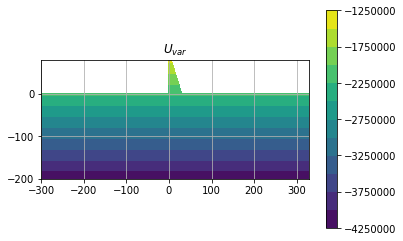

In [8]:
plot_SFIELD(SOL_x , nodes , elements, 0 , plt_type ="contourf", levels = 12 )

## $\sigma_y$

C:\Users\AX201 GMRS\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'shading'
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

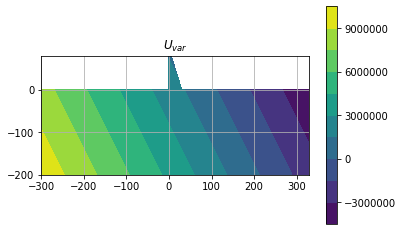

In [9]:
plot_SFIELD(SOL_y , nodes , elements, 0 , plt_type ="contourf", levels = 12 )

## $\tau_{xy}$

C:\Users\AX201 GMRS\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'shading'
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

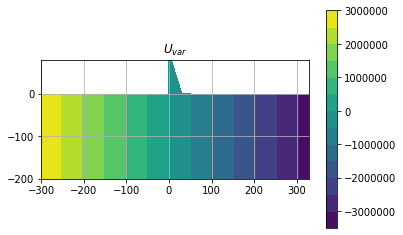

In [10]:
plot_SFIELD(SOL_xy , nodes , elements, 0 , plt_type ="contourf", levels = 12 )

### References

Juan Gómez, Nicolás Guarín-Zapata (2018). SolidsPy: 2D-Finite Element Analysis with Python, <https://github.com/AppliedMechanics-EAFIT/SolidsPy>.

In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()